<a href="https://colab.research.google.com/github/srilatha4567/Aiml_task2/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- TASK 2: DATA CLEANING ---

Original Dataset Size: (93, 27)

Missing values per column:
Manufacturer           4
Model                  1
Type                   3
Min.Price              7
Price                  2
Max.Price              5
MPG.city               9
MPG.highway            2
AirBags               38
DriveTrain             7
Cylinders              5
EngineSize             2
Horsepower             7
RPM                    3
Rev.per.mile           6
Man.trans.avail        5
Fuel.tank.capacity     8
Passengers             2
Length                 4
Wheelbase              1
Width                  6
Turn.circle            5
Rear.seat.room         4
Luggage.room          19
Weight                 7
Origin                 5
Make                   3
dtype: int64


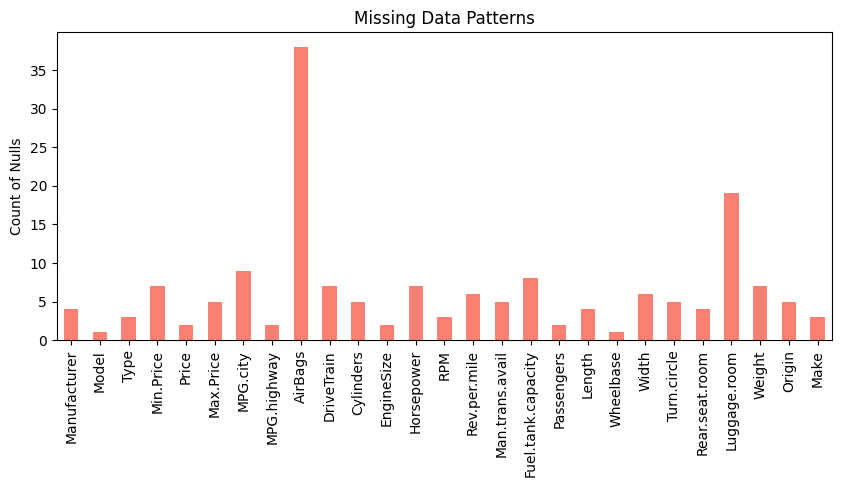


Dropped columns due to high missing values: ['AirBags']

--- Validation After Cleaning ---
Total missing values remaining: 0
Cleaned Dataset Size: (93, 26)

Summary: Missing values handled. Dataset is now ready for ML modeling.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATASET
# Using a sample house price dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv"
df = pd.read_csv(url)

print("--- TASK 2: DATA CLEANING ---\n")
print(f"Original Dataset Size: {df.shape}")

# 2. IDENTIFY & VISUALIZE MISSING DATA
missing_counts = df.isnull().sum()
print("\nMissing values per column:")
print(missing_counts[missing_counts > 0])

# Simple bar chart for missing data
plt.figure(figsize=(10, 4))
missing_counts[missing_counts > 0].plot(kind='bar', color='salmon')
plt.title('Missing Data Patterns')
plt.ylabel('Count of Nulls')
plt.show()

# 3. REMOVE COLUMNS WITH EXTREMELY HIGH MISSING VALUES (Threshold: > 40%)
threshold = len(df) * 0.4
cols_to_drop = df.columns[df.isnull().sum() > threshold]
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nDropped columns due to high missing values: {list(cols_to_drop)}")

# 4. MEAN/MEDIAN IMPUTATION (For Numerical Columns)
# Using Median because it is robust to outliers
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# 5. MODE IMPUTATION (For Categorical Columns)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 6. VALIDATE AFTER CLEANING
print("\n--- Validation After Cleaning ---")
print(f"Total missing values remaining: {df.isnull().sum().sum()}")
print(f"Cleaned Dataset Size: {df.shape}")

# 7. COMPARE BEFORE VS AFTER
print("\nSummary: Missing values handled. Dataset is now ready for ML modeling.")


Imputation: Filling missing values rather than deleting them.
​Central Tendency: Using Mean, Median, or Mode to fill gaps.
​Data Integrity: Maintaining the dataset size while improving quality.
​Outlier Robustness: Choosing Median over Mean for skewed numerical data.
​Null Pattern Visualization: Using charts to identify where data is missing.
​Feature Dropping: Removing columns that have too many nulls to be useful.